In [1]:
import torch
from torch import nn

In [2]:
from d2l_common import RNNScratch, Module


class StackedRNNScratch(Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.sigma = sigma
        self.rnns = nn.Sequential(
            *[RNNScratch(num_inputs if i == 0 else num_hiddens, num_hiddens, sigma) for i in range(num_layers)]
        )

    def forward(self, inputs, Hs=None):
        outputs = inputs
        if Hs is None:
            Hs = [None] * self.num_layers
        for i in range(self.num_layers):
            outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
            outputs = torch.stack(outputs, dim=0)
        return outputs, Hs

In [9]:
from d2l_common import Trainer, TimeMachine, RNNLMScratch

data = TimeMachine(batch_size=1024, num_steps=32, device='mps')
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab), num_hiddens=32, num_layers=1)
model = RNNLMScratch(rnn_block, len(data.vocab), lr=0.01).to('mps')
trainer = Trainer(max_epochs=500, gradient_clip_val=1)
trainer.fit(model, data)

complete 0 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 1 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 2 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 3 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 4 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 5 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 6 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 7 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 8 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 9 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 10 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 11 epoch train_loss=3.960840940475464 validate_loss=3.960840940475464
complete 12 epoch train_loss=3.960840940475464 validate_loss=3

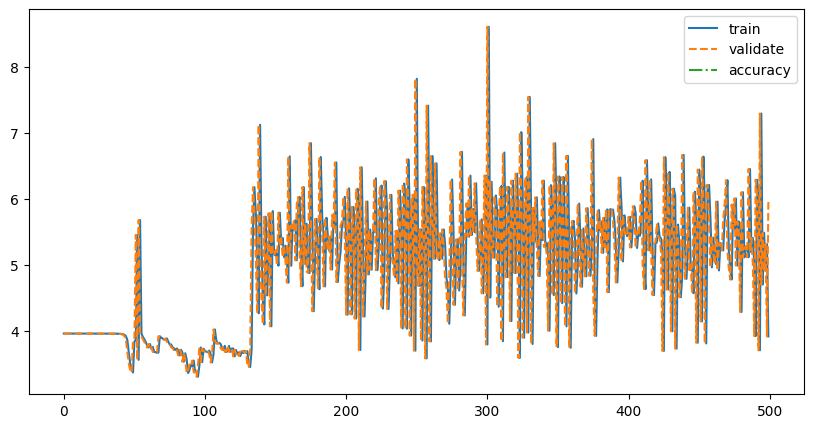

In [7]:
trainer.plot()